<a href="https://colab.research.google.com/github/FatimaEzzedinee/ML-bachelor-course-labs-sp24/blob/main/05_other_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning SP 2024/2025

- Prof. Cesare Alippi
- Andronov Mikhail ([`andronov.mikhail@usi.ch`](mailto:andronov.mikhail@usi.ch))<br>
- Pasini Samuele ([`pasini.samuele@usi.ch`](mailto:pasini.samuele@usi.ch))<br>
- Valentina Moretti ([`valentina.moretti@usi.ch`](mailto:valentina.moretti@usi.ch))

---

# Lab 05: Other methods

In this lab we will see how to use some of the more advanced methods that we saw in the last lectures. In particular, we will focus on their use for very simple (and very famous) classification tasks such as the XOR problem and the Iris dataset.

Let's start by importing what's needed and defining a helper function:

In [1]:
# first we define some helper functions to generate data and plot results
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams["image.cmap"] = "PiYG_r"  # Define the colors to use in the plot
plt.rcParams["scatter.edgecolors"] = 'k'

# function to plot decision boundaries
def plot_decision_surface(model, x, y, transform=lambda x:x, plot_margins=False):
  #init figure
  fig = plt.figure()

  # Create mesh
  h = .01  # step size in the mesh
  x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
  y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

  # plot train data (assuming 2 dimensions for the task)
  plt.scatter(x[:, 0], x[:, 1], c=y)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')

  y_pred = model.predict(transform(np.c_[xx.ravel(), yy.ravel()]))

  y_pred = y_pred.reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, alpha=.2)

# A) Support Vector Machines

SVMs are powerful ML models, capable of performing linear or nonlinear classification, regression and more. They are well suited for most tabular small-to-medium sized tasks.

Let's see how we can use Support Vector Machines and the kernel trick to solve classification problems where linear approaches fail.





## A.1) The XOR problem

As already discussed, linear methods are unable to solve problems in which the classes are not linearly separable.

The XOR problem is the classic example.

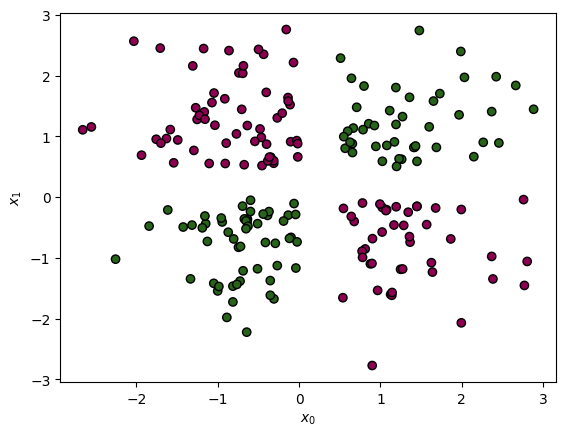

In [2]:
np.random.seed(0)

x = np.random.randn(200, 2) # sample some points from a bivariate gaussian
y = np.logical_xor(x[:, 0] > 0., x[:, 1] > 0.)

x[x > 0.] += .5 # this is just to explicitely separate them

plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.show()

Remember, a **kernel** (oversimplifying a lot) is a function that gives us a particular measure of affinity between two points.
The idea is to **embed** the input data into a new representation; if such new representation is effective, the task is more easily solvable in the embedding space.

#### Linear kernel

For the **linear kernel** this is the dot product of the input samples:

$$K(x_1, x_2) = x_1^Tx_2$$

It is then applied to any combination of two data points (samples) in the dataset.

Training a [**SVC**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classifier) on a linear kernel results in an untransformed feature space, where the hyperplane and the margins are straight lines.

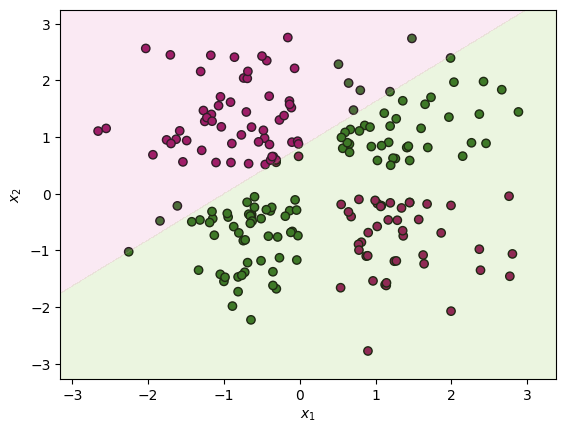

In [3]:
from sklearn.svm import SVC

def k(x1, x2):
  return np.dot(x1, x2.T)
# Note: different notation of the dot product here is because the X matrix is given as a nxd matrix
# and observations are treated as row vectors

svm = SVC(kernel=k)

svm.fit(x, y)

plot_decision_surface(svm, x, y)

### Polynomial kernel

As you can see using a linear kernel we are still limited to drawing hyperplanes, let's go back and try out something more interesting...

We can use kernels in the dual formulation of the SVM problem to project the input space in a high (possibly infinite) dimensional space. This allows to deal with nonlinear classification tasks. Let's see some cases.

The **polynomial kernel** changes the notion of similarity. The kernel function is defined as:

$$K(x_1, x_2) = (\gamma \cdot x_1^T x_2 + r)^d$$

where $d$ is the degree of the polynomial, $\gamma$ controls the influence of each individual training sample on the decision boundary and $r$ is the bias term (coef0).

**Note:** Using a polynomial kernel is equivalent to creating [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and then fitting a SVC with a linear kernel on the transformed data, although this alternative approach would be computationally expensive for most datasets.

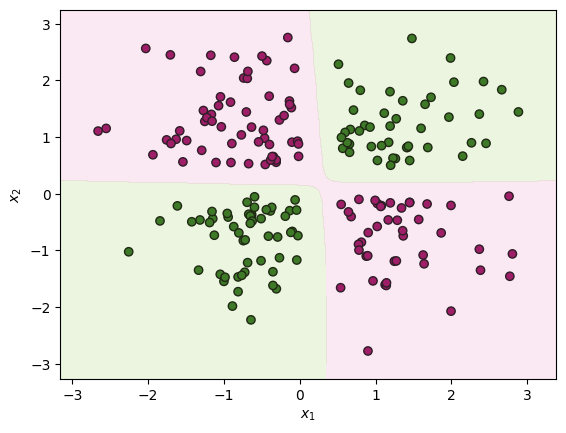

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

def k(x1, x2):
   gamma = 0.25
   r = 1
   d = 3
   return  (gamma * np.dot(x1, x2.T) + r)**d

svm = SVC(kernel=k)

svm.fit(x, y)

plot_decision_surface(svm, x, y)

### RBF kernel

Now let's check the radial basis function (RBF) kernel, also known as the Gaussian kernel, is defined as:

$$K(x_1, x_2) = exp(-\gamma \cdot \lVert x_1 - x_2 \rVert ^2)$$

The larger the euclidean distance between two points $\lVert x_1 - x_2 \rVert$, the closer the kernel function is to zero. In fact this is a bell-shaped function varying from 0 to 1, decreasing exponentially with the distance of the two points. This means that two points far away are more likely to be dissimilar.

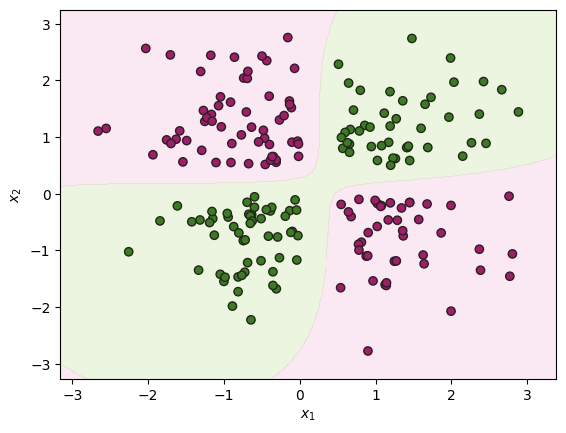

In [5]:
def k(x1, x2):
   gamma = 0.25
   return  np.exp(-gamma * euclidean_distances(x1, x2)**2)

svm = SVC(kernel=k)

svm.fit(x, y)

plot_decision_surface(svm, x, y)

### Sklearn kernel implementations

Of course **we do not need to define kernels functions by hand**, they are already implemented in `scikit-learn`.

We can also check which are the support vectors.



#### **Exercise:**

In the next cell, check the influence of the hyperparameters on the decision boundary.

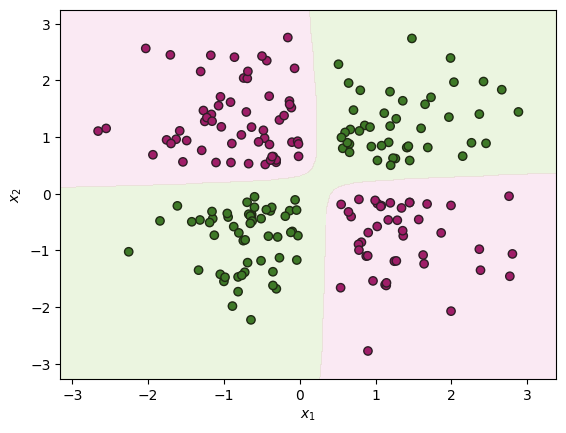

In [12]:
# Your choices for the hyperparameters:
kernel_choice = "poly" # common choices here are "poly", "rbf", "sigmoid"
C = 1 # Regularization term, the strength of the regularization is inversely proportional to it. Must be strictly positive.
degree = 3 # this is relevant only if kernel_choice is set to "poly"; otherwise it's ignored.
gamma = 0.25 # relevant when kernel_choice is "poly" or "rbf" or "sigmoid"
coef0 = 1 # bias term, relevant when kernel choice is "poly" or "sigmoid"

### Model fitting
svm = SVC(kernel=kernel_choice,
          C=C,
          degree=degree,
          coef0=coef0,
          gamma=.2)
svm.fit(x, y)

plot_decision_surface(svm, x, y)
# If you want to see the support vectors uncomment below
#plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], marker='x')
plt.show()

You can find more on the mathematical formulation of scikit-learn's SVC and much more [here](https://scikit-learn.org/stable/modules/svm.html#svc).

## A.2) Iris dataset

As a second case study, for our next classifiers, we are going to use the infamous [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset, where the objective is to classify flowers based on some features:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="https://media.licdn.com/dms/image/D4D12AQF5vivFTAdZjQ/article-cover_image-shrink_600_2000/0/1700911428185?e=2147483647&v=beta&t=RaJufpE5-ZMvIMZFVTy4dNtvnKHVgmThtTORx-_qu6Q" alt="Iris dataset" width="725" height="375">

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

x.shape, y.shape, set(y), iris.target_names # 150 observations, 4 features, 3 possible classes

((150, 4),
 (150,),
 {np.int64(0), np.int64(1), np.int64(2)},
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

Let's give a look at the data.

We only use two features to make visualization easier, however keep in mind that the inclusion of the other features could help for the classification task.

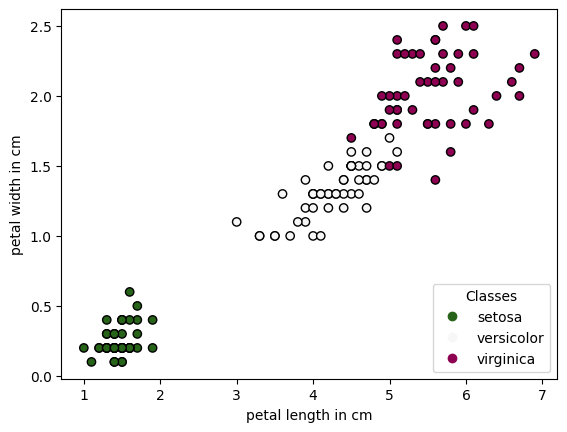

In [15]:
features = ["sepal length in cm" ,"sepal width in cm", "petal length in cm", "petal width in cm"]
# We just use two features for the sake of visualization
features_used = [2,3]
x_prime = x[:, features_used]

_, ax = plt.subplots()
scatter  = ax.scatter(x_prime[:, 0], x_prime[:, 1], c=y)
ax.set_xlabel(features[features_used[0]])
ax.set_ylabel(features[features_used[1]])
ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.show()

Let's try first with SVM

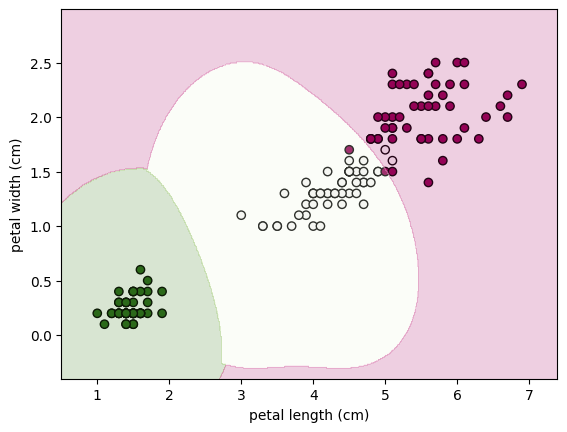

In [39]:
# C is what we call Lambda in the lecture
# bigger C means smaller margin, but less misclassification, smaller C means bigger margin, but more misclassification
# if gamma is small, each point has a big influence on the decision boundary, if gamma is big, each point has a small influence
classifier = SVC(kernel='rbf', gamma=1, C=1)

classifier.fit(x_prime, y)

plot_decision_surface(classifier, x_prime, y)
#plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], marker='x')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

Tuning correctly the hyperparameters is fundamental (check [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)).

In particular (for the `rbf` kernel):

* `C` : cost of a misclassification error. The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.
The strength of the regularization is inversely proportional to it. Must be strictly positive.

* `gamma`: $\gamma$ = $1 / \sigma$ of the Gaussian kernel $K(x_1, x_2) = exp(-\gamma \cdot \lVert x_1 - x_2 \rVert ^2)$. 
    **$\gamma$** controls how quickly the similarity $K(x_1, x_2)$ decreases as the distance between points $x_1$ and $x_2$ increases.
    - A **small** $\gamma$ means the similarity decreases **slowly**, resulting in a **large radius of influence** —> each training point affects a broader region of the space.
    - A **large** $\gamma$ causes the similarity to drop **rapidly**, giving a **small radius of influence** —> each point only influences its immediate surroundings.

# B) Decision Trees

Again we can use `scikitlearn` to build Decision Trees pretty easily in python.

Decision Trees are a non-parametric supervised learning method used for classification and regression.

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

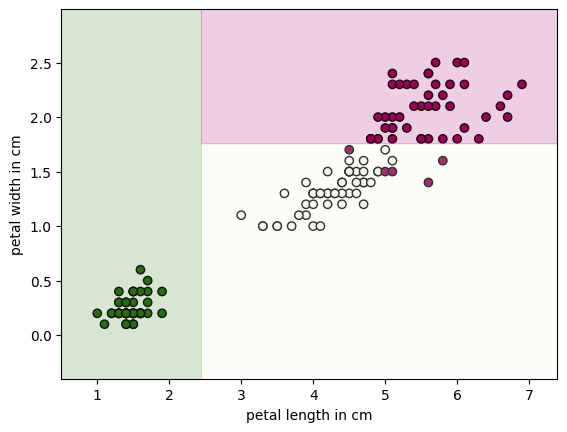

In [40]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=2,
                                    random_state=42)
# try also with max_depth 3
classifier.fit(x_prime, y)

plot_decision_surface(classifier, x_prime, y)
plt.xlabel(features[features_used[0]])
plt.ylabel(features[features_used[1]])

plt.show()

Now let's try to build a tree using all the features.

We can't anymore look at only two dimensions to understand how the model is operating. Instead we'll look directly at the tree.


[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]

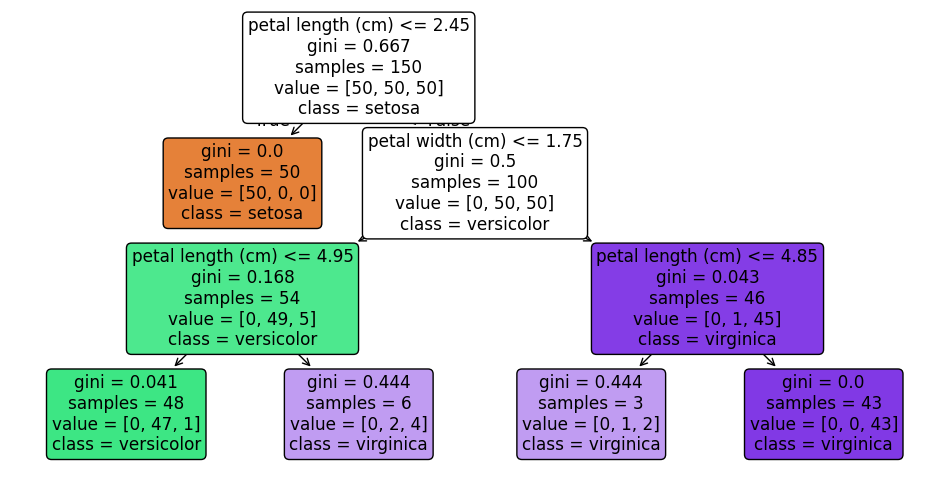

In [42]:
from sklearn.tree import plot_tree

classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier.fit(x, y)

plt.figure(figsize=(12,6))
plot_tree(classifier, filled=True, feature_names=iris.feature_names, rounded=True, class_names=iris.target_names)

# gini is the impurity

To understand the tree:
- split condition (e.g., petal length <= 2.45)
- Gini impurity (a measure of class impurity. The lower is better)
- number of samples in that node
- class distribution (e.g., [50, 0, 0] = 50 setosa, 0 versicolor, 0 virginica)
- predicted class for the leaf node

### How does this work?

The CART algorithm, used to train Decision Trees, works by splitting the training set into two subset using a single feature $d$ and a threshold $t$, which are chosen so that the split produces the **purest** subsets (weighted by size). Purity is to be intended in terms of the `criterion` selected.

$$R_{left}(d,t) = R_{parent} \cap \{x : x_d \leq t\}$$
$$R_{right}(d,t) = R_{parent} \cap \{x : x_d > t\}$$

It does this for every node recursively until impurity cannot be reduced anymore or the `max_depth` of the tree is reached. The classification task is then carried out with majority voting (or some other decision rule) at the level of leaves.

**Note:** This is a greedy algorithm, meaning that the tree which is found is not necessarily optimal overall.

There are several hyperparameters that control additional stopping conditions while learning the tree, essentially regularizing it: check in the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Let's also go back and check what happens if we don't regularize well our model.

Decision Trees are **easy to interpret** and that's why they are popular for several problems that requires explainability.

### Instabilities

One final (bad) note on decision trees. As you've seen Decision Trees operate by decision boundaries which are orthogonal to the axis. However this implies that some simple transformations to the representation of a problem (e.g. a rotation) can lead to difficulties in fitting a tree and instabilities. As an example:

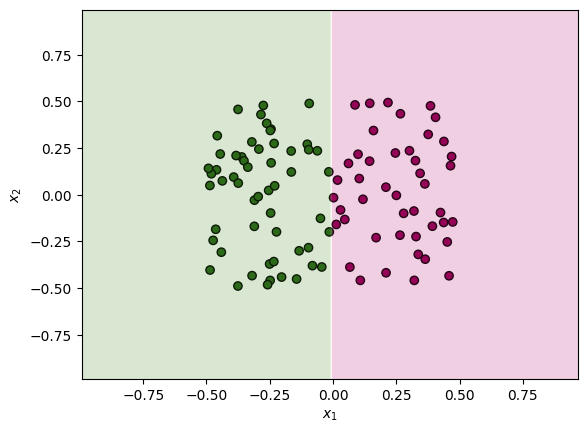

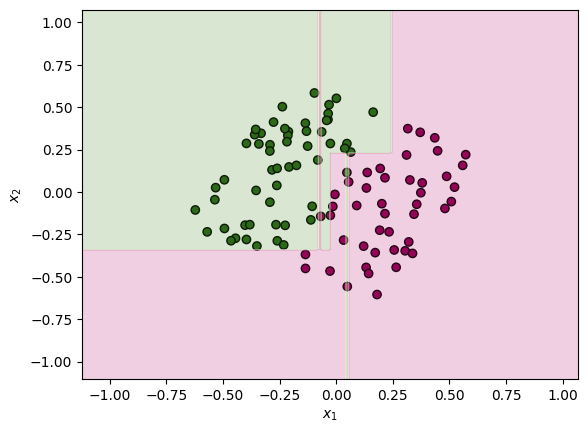

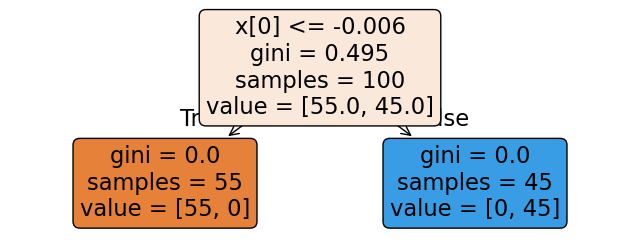

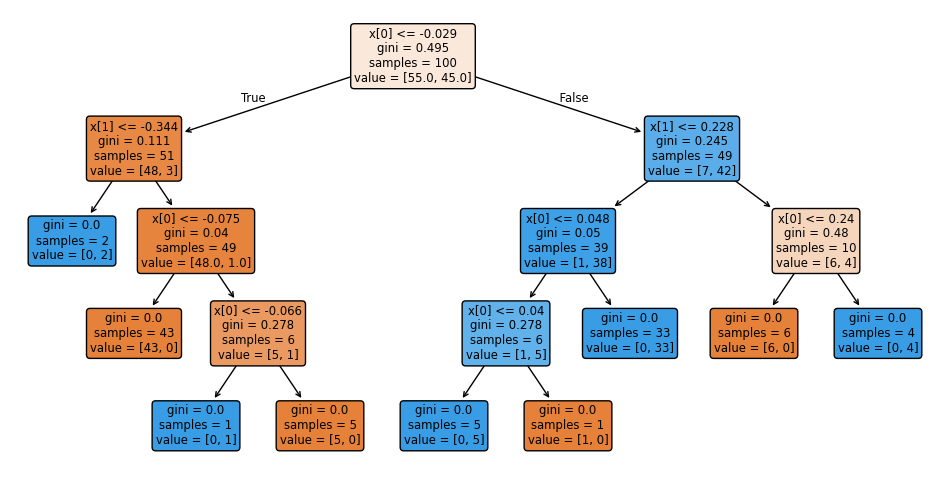

In [43]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 6  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

plot_decision_surface(tree_clf_square, X_square, y_square)
plot_decision_surface(tree_clf_rotated_square, X_rotated_square, y_square)

plt.show()

plt.figure(figsize=(8,3))
plot_tree(tree_clf_square, filled=True, rounded=True)
plt.show()

plt.figure(figsize=(12,6))
plot_tree(tree_clf_rotated_square, filled=True, rounded=True)
plt.show()


# C) Random Forests

We saw during classes that the expected test error can be written as

$${error} = {bias}^2 + variance + noise$$

In general we cannot reduce the noise, we can reduce the bias increasing model complexity, but this makes the variance increase too.

Can we reduce the variance without increasing the bias and without getting more data? **Yes**



The idea is to take the average prediction of $K$ models.

<img src="https://miro.medium.com/v2/resize:fit:696/1*7AxWhp2UMm7smg9ZmXlRHg.png" width=500>

In fact, if we consider our model to be a random variable $X$, the variance of the mean is lower than the variance of the population, i.e., ${Var}(\overline X_K) \le Var(X)$ (using the CLT: ${Var}(\overline X_K) \approx \frac{Var(X)}{K})$.


The problem is that we have only a single training set: we can use **bootstrapping** (i.e., sampling with replacement: each new dataset has the same number of instances as the original dataset, but some instances will appear multiple times, while others may not appear at all.).
**Bootstrapping** is used to learn the K models from K sets of bootstrapped samples (note that this can be done in parallel). The prediction is then made by aggregating the predictions of all predictors (e.g. the mode for classification).

This technique is known as **bagging** and works particularly well with trees.

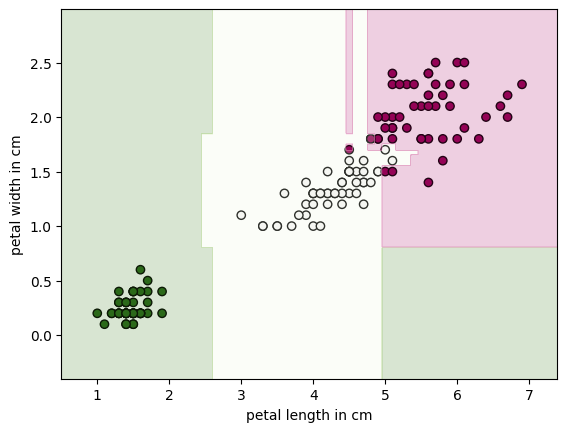

In [45]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the number of trees in the forest
model = RandomForestClassifier(n_estimators=5,
                               random_state=42)
model.fit(x_prime, y)

plot_decision_surface(model, x_prime, y)
plt.xlabel(features[features_used[0]])
plt.ylabel(features[features_used[1]])
plt.show()

[Hyperparameters of Random Forest ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) include mostly those needed for Decision Trees AND those relative to the ensemble (e.g. `n_estimators`, `bootstrap`).

### Feature importance

We've seen that one of the main pros of trees is their interpretability. Did we lose that going toward a forest?
Not completely:

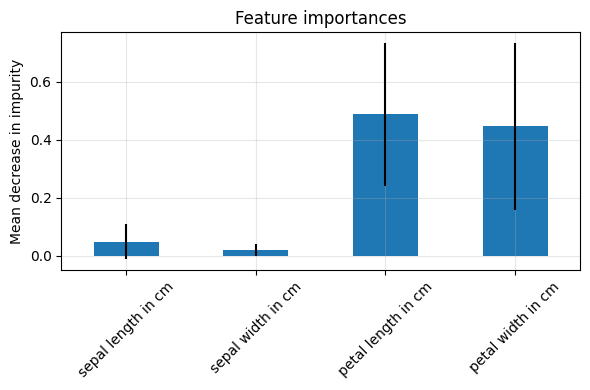

In [46]:
import pandas as pd

model = RandomForestClassifier(n_estimators=5,
                               random_state=42)
model.fit(x, y)

importances = model.feature_importances_ # they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)


forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots(figsize=(6,4))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
fig.tight_layout()
plt.show()

Obvsiouly we could also look at all the single trees of the forest but when they're many, feature importance convey information in a more intuitive and faster way.

### Ensemble learning

If you aggregate the predictions of a group of predictors, you will often get better predictions than with the best individual predictor. Such group is called ensemble, and this technique is called, in general, ensemble learning.

Note that the predictors don't necessarily have to be of the same class, and in general the ensemble works best when the predictors are independent from one another, in fact diversity, even between trees in random forest for example, is desirable (notice that trees are learned with subset of features in many cases).

Surprisingly even if all the predictors are weak learners, the ensemble might perform quite well!

#### Pointers to some popular (different) ensemble methods

* `xgboost`: https://xgboost.readthedocs.io/en/latest/
* `lightgbm`: https://lightgbm.readthedocs.io/en/latest/

Note: these methods are based on **boosting**, an approach based on the idea of using a set of weak learners to iteratively reduce the error. Just to give an intuition:

<img src="https://pantelis.github.io/cs634/docs/common/lectures/ensemble/boosting/images/gradient-boost-example.png#center" height=600>

**Final remark:** Some of the models that you've seen today are actually very powerful and in some contexts (low to medium regime data, tabular data) can outperform more complex (and fancy) models. As an example, take a look at [this article](https://www.sciencedirect.com/science/article/pii/S0169207021001679), summarizing the results of one of the most important forecasting Kaggle competitions of the last years.